# SOMS RV, Temp, DIC, MLD Maps

In [1]:
import sys
import numpy as np
import scipy as sp
import netCDF4 as nc4
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pandas as pd
#from glob import glob
import glob

import numpy.linalg as linalg
import scipy.signal as signal
import scipy.ndimage as ndimage
import scipy.interpolate as interpolate

from netCDF4 import Dataset

from itertools import repeat

# import sys
# sys.path.insert(0, '/home/tsmith/scratch/eddyTracking/ecjoliver/')
# import params 

import re

from scipy.io.netcdf import netcdf_file as netcdf
import cmocean.cm as cmo
import warnings
import matplotlib.colors as colors
from cartopy import crs as ccrs, feature as cfeature

import copy
sys.path.insert(0, '/home/tsmith/scratch/SOMS_equal/')
from SOMS_code import *
from RegridderPLUS import *

In [2]:
import datetime
import netCDF4

In [3]:
%matplotlib inline

In [4]:
def find_ind(grid1d, coord):
        a=abs(grid1d-coord)
        return np.where(a==np.min(a))[0][0]

## Load SOM files

In [5]:
grid_CYC = xr.open_mfdataset('/home/tsmith/scratch/Anomalies_NEW/DATA/SOMS_Dataset_Cyclonic.nc')
grid_ACYC = xr.open_mfdataset('/home/tsmith/scratch/Anomalies_NEW/DATA/SOMS_Dataset_Anticyclonic.nc')


In [6]:
RV_C = grid_CYC['Relative_vorticity']
Temp_C = grid_CYC['Temperature']
Temp_anomC = grid_CYC['Temperature_anomaly']
DIC_C = grid_CYC['DIC']
DIC_anomC = grid_CYC['DIC_anomaly']
MLD_C = grid_CYC['MLD']
MLD_anomC = grid_CYC['MLD_anomaly']
Rad_C = grid_CYC['Radius']
Amp_C = grid_CYC['Amplitude']
Mono_C = grid_CYC["SST_monopole"] 
Dipole_C = grid_CYC["SST_dipole"] 

In [7]:
RV_A = grid_ACYC['Relative_vorticity']
Temp_A = grid_ACYC['Temperature']
Temp_anomA = grid_ACYC['Temperature_anomaly']
DIC_A = grid_ACYC['DIC']
DIC_anomA = grid_ACYC['DIC_anomaly']
MLD_A = grid_ACYC['MLD']
MLD_anomA = grid_ACYC['MLD_anomaly']
Rad_A = grid_ACYC['Radius']
Amp_A = grid_ACYC['Amplitude']
Mono_A = grid_ACYC["SST_monopole"] 
Dipole_A = grid_ACYC["SST_dipole"] 

In [8]:
freqC = grid_CYC['Node_frequency']
freqA = grid_ACYC['Node_frequency']

In [9]:
percC = freqC/sum(freqC)*100
percA = freqA/sum(freqA)*100

In [10]:
depth = grid_CYC['deptht']

In [11]:
#SOM Map Config
xdim=3
ydim=3
n=xdim*ydim

In [16]:
radA_array = Rad_A.values
radC_array = Rad_C.values

### FIND LIMITS: 4r

In [17]:
#make limits 4r of largest avg radius

In [18]:
lim_spec = np.arange(-352.5,353,7.5)

In [19]:
x1 = find_ind(lim_spec,-4*np.max(np.concatenate([radC_array,radA_array])))

In [20]:
x2 = find_ind(lim_spec,4*np.max(np.concatenate([radC_array,radA_array])))

In [21]:
lim=47-x1

## Figure 2: Relative Vorticity

In [22]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [23]:
#Size of input box
x_dist = lim_spec[47-14:47+15]
y_dist = lim_spec[47-14:47+15]

In [26]:
#for text
Rad_A = Rad_A.values
Rad_C = Rad_C.values

Amp_A = Amp_A.values
Amp_C = Amp_C.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Text(0.01, 0.4, 'Distance (km)')

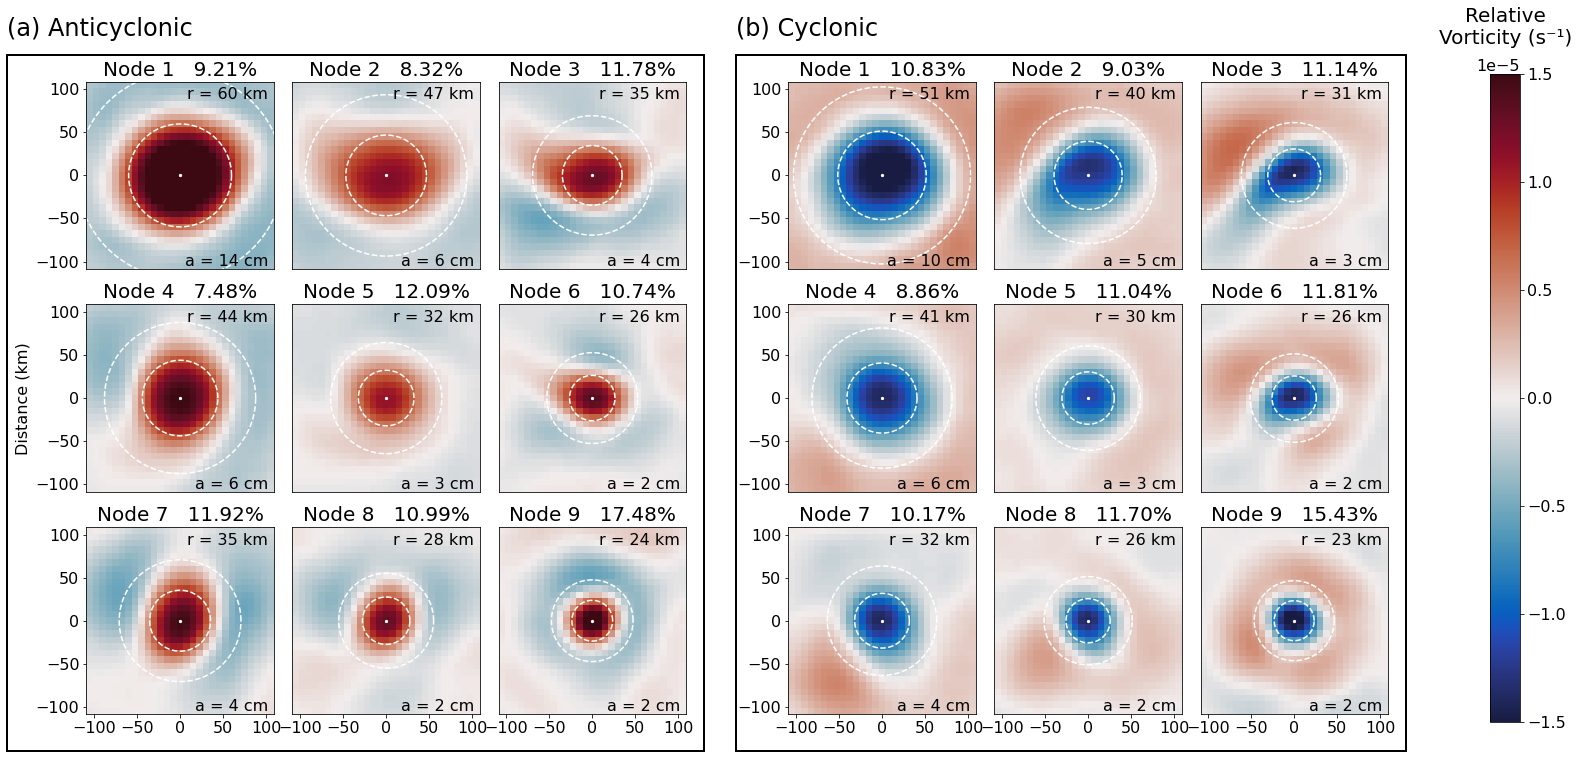

In [27]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_spec, lim_spec,  
                            RV_A[k,:,:]
                            ,vmin = -1.5e-5, vmax= 1.5e-5
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-100,-50,0,50,100] if col == 0 else [])
    ax.set_xticks([-100,-50,0,50,100]  if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f%%" % (k+1, percA[k]),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(SOMS_RV_arrayA[k,0,:,:].max(('y','x')))))
    ax.set_ylim(-108.75,108.75)
    ax.set_xlim(-108.75,108.75)
    ax.text(0.97, 0.97, 'r = %i km' %round(Rad_A[k]), transform=ax.transAxes, ha='right', va='top')
    ax.text(0.97, 0.08, 'a = %i cm' %round(Amp_A[k]*100), transform=ax.transAxes, ha='right', va='top')
    
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

#     #CIRCLE 3rad
#     x3=3*(radA_array[k])*np.cos(angle)
#     y3=3*(radA_array[k])*np.sin(angle)
#     ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_spec,lim_spec,  
                            RV_C[k,:,:]
                            ,vmin = -1.5e-5, vmax= 1.5e-5
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-100,-50,0,50,100] if col == 0 else [])
    ax.set_xticks([-100,-50,0,50,100]if row == 2 else [])
    ax.set_title("Node %i   %.2f%%" % (k+1, percC[k]),fontsize=20)
    ax.set_ylim(-108.75,108.75)
    ax.set_xlim(-108.75,108.75)
    ax.text(0.97, 0.97, 'r = %i km' %round(Rad_C[k]), transform=ax.transAxes, ha='right', va='top')
    ax.text(0.97, 0.08, 'a = %i cm' %round(Amp_C[k]*100), transform=ax.transAxes, ha='right', va='top')
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

#     #CIRCLE 3rad
#     x3=3*(radC_array[k])*np.cos(angle)
#     y3=3*(radC_array[k])*np.sin(angle)
#     ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)

    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.465, 0.005), 0.423, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-1.5e-5,-1e-5,-0.5e-5, 0.,0.5e-5, 1e-5,1.5e-5])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Relative\nVorticity (s\u207B\u00B9)',pad=30,fontsize=20)
#cbar.set_label('e-5', rotation=0, loc='top',labelpad=5, fontsize=16) 
 # Adjust the second parameter to move the tick labels vertically

#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.465, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_RV_surface29_Figure3_NEW.png', dpi=500)

## Figure 3: Surface Temperature Anomaly

In [28]:
#Monopole Dipole Variance

In [29]:
#distance mask
lim_km = np.arange(-47*7.5,47*7.5+1,7.5)

x_dist = np.empty(shape=(95,95))
y_dist = np.empty(shape=(95,95))

for i in range(95):
    #every row
    x_dist[i] = lim_km
    #every col
    y_dist[:,i] = lim_km


dist_matrix = np.empty(shape=(95,95))
for i in range(95):
    for j in range(95):
        dist = np.sqrt(x_dist[i,j]**2+y_dist[i,j]**2)
        dist_matrix[i,j] = dist

In [30]:
V_monoC = np.empty(n)
for k in range(n):
    dist = 2*Rad_C[k]
    
    mono = (Mono_C[k].where(dist_matrix<=dist,np.nan).std())**2
    total = (Temp_anomC[k,0].where(dist_matrix<=dist,np.nan).std())**2
    
    V_monoC[k] = mono/total

V_monoA = np.empty(n)
for k in range(n):
    dist = 2*Rad_A[k]
    
    mono = (Mono_A[k].where(dist_matrix<=dist,np.nan).std())**2
    total = (Temp_anomA[k,0].where(dist_matrix<=dist,np.nan).std())**2
    
    V_monoA[k] = mono/total


In [31]:
V_dipoleA = 1-V_monoA

In [32]:
V_dipoleC = 1-V_monoC

In [33]:
lim_specC = lim_spec[47-lim:48+lim]

Text(0.01, 0.4, 'Distance (km)')

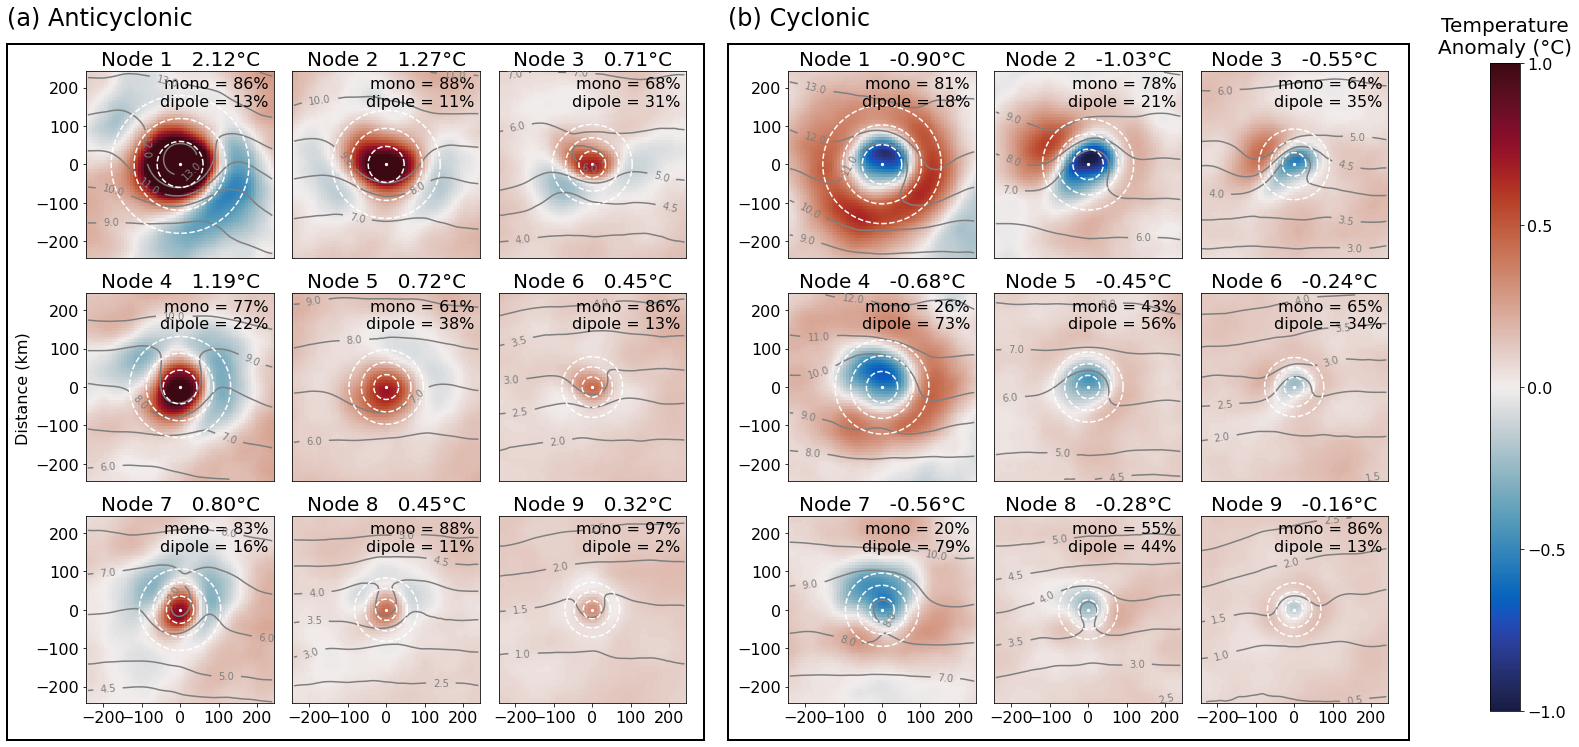

In [34]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomA[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomA[k,0,:,:].max(('y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(Temp_anomA[k,0,:,:].max(('y','x')))))
    
    ax.text(0.97, 0.97, 'mono = %i%%\ndipole = %i%%' %(V_monoA[k]*100, V_dipoleA[k]*100), transform=ax.transAxes, ha='right', va='top')
    #ax.text(0.9, 0.1, 'di = %i%%' %dipoleA[k], transform=ax.transAxes, ha='right', va='top')
    
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_array[k])*np.cos(angle)
    y3=3*(radA_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                            Temp_A[k,0,47-lim:48+lim,47-lim:48+lim],   
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomC[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomC[k,0,:,:].min(('y','x'))),fontsize=20)
    
    ax.text(0.97, 0.97, 'mono = %i%%\ndipole = %i%%' %(V_monoC[k]*100, V_dipoleC[k]*100), transform=ax.transAxes, ha='right', va='top')
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_array[k])*np.cos(angle)
    y3=3*(radC_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                    Temp_C[k,0,47-lim:48+lim,47-lim:48+lim],  
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.43, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/Temp_surface_Figure6_text.png', dpi=500)

## Figure 4: Temperature Anomaly Depth Secition

### Depth limits: 0.2°C as cut-off threshold

Text(0.01, 0.4, 'Depth (m)')

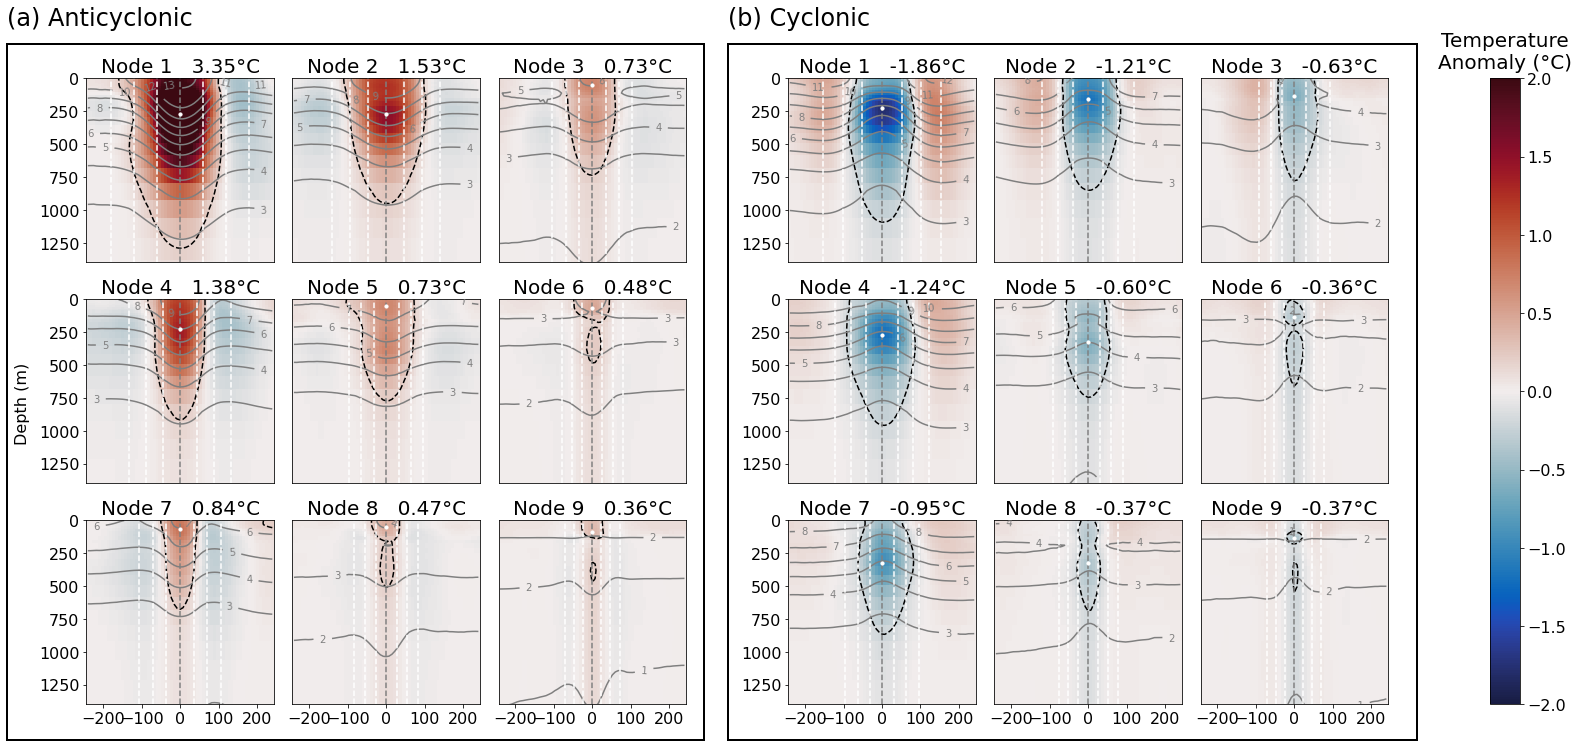

In [35]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, depth,  
                            Temp_anomA[k,:,47,47-lim:48+lim]
                            ,vmin = -2, vmax= 2
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    #ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([1250,1000,750,500,250,0] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomA[k,:,:,:].max(('deptht','y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(Temp_anomA[k,0,:,:].max(('y','x')))))
    ax.set_aspect('auto', adjustable='box')
    #plot depth of max anom
    dep_id, y_id, x_id = np.where(Temp_anomA[k] == Temp_anomA[k,:,:,:].max(('deptht','y','x')))
    
    
    ax.axvline(x=0,color='grey',linestyle='--')
    #CIRCLE 1rad
    ax.axvline(x=radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-radA_array[k],color='white',linestyle='--')
    
    ax.axvline(x=2*radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-2*radA_array[k],color='white',linestyle='--')
    
    ax.axvline(x=3*radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-3*radA_array[k],color='white',linestyle='--')
    
    line5= ax.contour(lim_specC, depth, Temp_anomA[k,:,47,47-lim:48+lim], [0.2],colors='k',linestyles='--')
    
    #ax.scatter(0,Temp_anomA[k,:,:,:].max(('y','x')),marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,depth, 
                            Temp_A[k,:,47,47-lim:48+lim],   
                     levels=[-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    ax.scatter(0,depth[dep_id[0]],marker='o',color='white',s=10,zorder=10)
    ax.set_ylim(1400,0)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, depth,  
                            Temp_anomC[k,:,47,47-lim:48+lim]
                            ,vmin = -2, vmax= 2
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    #ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([1250,1000,750,500,250,0] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomC[k,:,:,:].min(('deptht','y','x'))),fontsize=20)
    
    #plot depth of max anom
    dep_id, y_id, x_id = np.where(Temp_anomC[k] == Temp_anomC[k,:,:,:].min(('deptht','y','x')))
    
    
    ax.axvline(x=0,color='grey',linestyle='--')
    #CIRCLE 1rad
    ax.axvline(x=radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-radC_array[k],color='white',linestyle='--')
    
    ax.axvline(x=2*radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-2*radC_array[k],color='white',linestyle='--')
    
    ax.axvline(x=3*radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-3*radC_array[k],color='white',linestyle='--')
    
    line5= ax.contour(lim_specC, depth, Temp_anomC[k,:,47,47-lim:48+lim], [-0.2],colors='k',linestyles='--')
    
    #ax.scatter(0,Temp_anomC[k,:,47,:].max(('y','x')),marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,depth, 
                    Temp_C[k,:,47,47-lim:48+lim],  
                      levels=[-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    ax.set_ylim(1400,0)
    ax.scatter(0,depth[dep_id[0]],marker='o',color='white',s=10,zorder=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.435, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-2.0,-1.5,-1,-0.5, 0., 0.5,1.0,1.5,2.0])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.88)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Depth (m)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/Temp_depth_Figure7.png', dpi=500)

## Figure 5: Surface DIC Anomaly

Text(0.01, 0.4, 'Distance (km)')

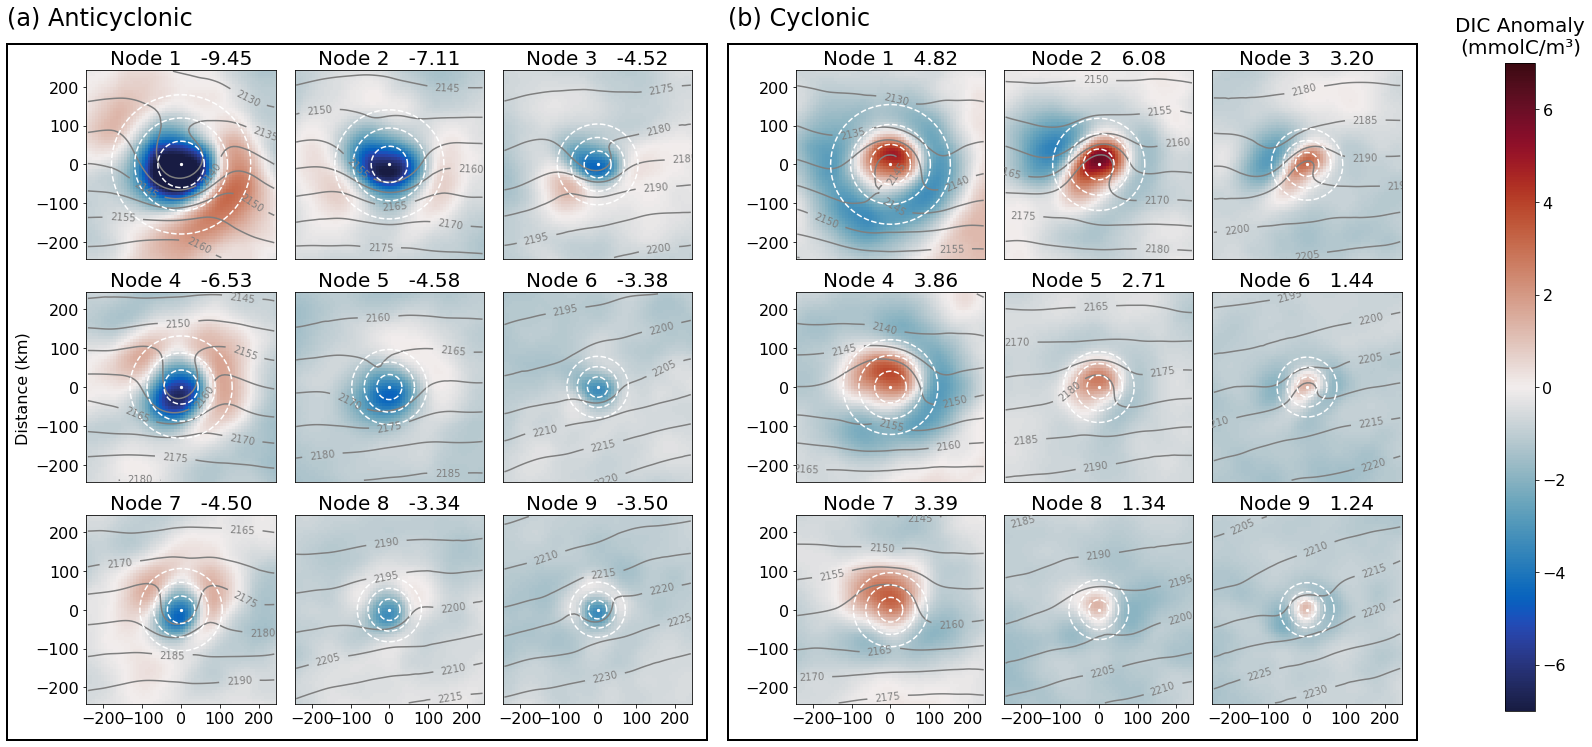

In [36]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            DIC_anomA[k,0,47-lim:48+lim,47-lim:48+lim]*1e6
                            ,vmin = -7, vmax= 7
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f" % (k+1, (DIC_anomA[k,0,:,:]*1e6).min(('y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(DIC_anomA[k,0,:,:].max(('y','x')))))
    
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_array[k])*np.cos(angle)
    y3=3*(radA_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                            DIC_A[k,0,47-lim:48+lim,47-lim:48+lim]*1e6,   
                     levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
       2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.442, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            DIC_anomC[k,0,47-lim:48+lim,47-lim:48+lim]*1e6
                            ,vmin = -7, vmax= 7
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %.2f" % (k+1, (DIC_anomC[k,0,:,:]*1e6).max(('y','x'))),fontsize=20)
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_array[k])*np.cos(angle)
    y3=3*(radC_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                    DIC_C[k,0,47-lim:48+lim,47-lim:48+lim]*1e6,  
                     levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
       2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.435, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='DIC anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-6, -4, -2,  0,  2,  4,  6])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('DIC Anomaly\n(mmolC/m\u00B3)',pad=10,fontsize=20)
#cbar.set_label('DIC anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/DIC_surface_Figure8.png', dpi=500)

## Figure 6: DIC Anomaly Depth Section

In [37]:
#find depth limits
#use -2.5 and 2.5

Text(0.01, 0.4, 'Depth (m)')

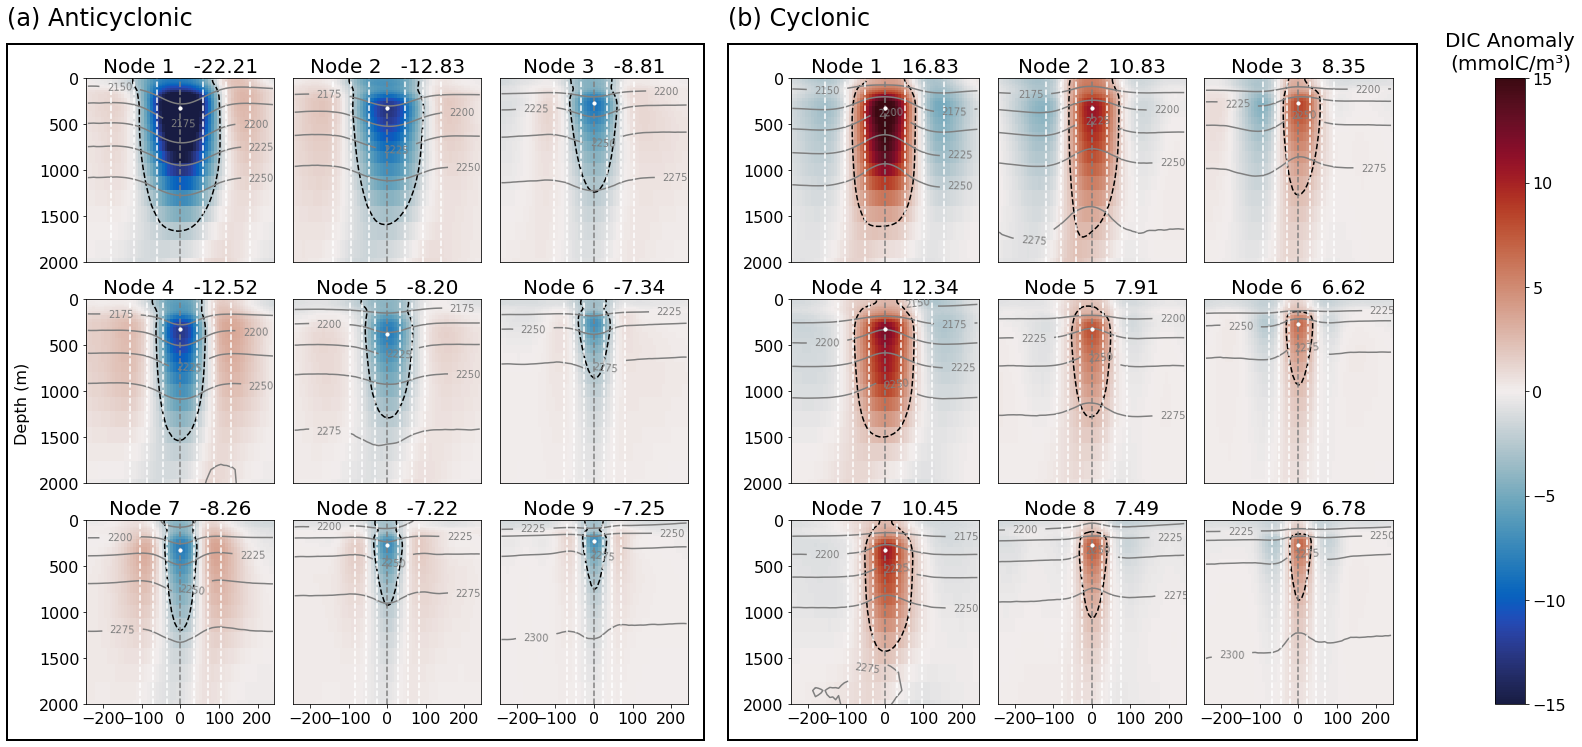

In [38]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, depth,  
                            DIC_anomA[k,:,47,47-lim:48+lim]*1e6
                            ,vmin = -15, vmax= 15
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    #ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([2000, 1500, 1000,  500,    0] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f" % (k+1, (DIC_anomA[k,:,:,:]*1e6).min(('deptht','y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(DIC_anomA[k,0,:,:].max(('y','x')))))
    ax.set_aspect('auto', adjustable='box')
    #plot depth of max anom
    dep_id, y_id, x_id = np.where(DIC_anomA[k] == DIC_anomA[k,:,:,:].min(('deptht','y','x')))
    ax.scatter(0,depth[dep_id[0]],marker='o',color='white',s=10,zorder=10)
    
    ax.axvline(x=0,color='grey',linestyle='--')
    #CIRCLE 1rad
    ax.axvline(x=radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-radA_array[k],color='white',linestyle='--')
    
    ax.axvline(x=2*radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-2*radA_array[k],color='white',linestyle='--')
    
    ax.axvline(x=3*radA_array[k],color='white',linestyle='--')
    ax.axvline(x=-3*radA_array[k],color='white',linestyle='--')
    
    line5= ax.contour(lim_specC, depth, DIC_anomA[k,:,47,47-lim:48+lim]*1e6, [-2.5],colors='k',linestyles='--')
    
    #ax.scatter(0,DIC_anomA[k,:,:,:].max(('y','x')),marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,depth, 
                            DIC_A[k,:,47,47-lim:48+lim]*1e6,   
                        levels = [2125, 2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    ax.set_ylim(2000,0)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, depth,  
                            DIC_anomC[k,:,47,47-lim:48+lim]*1e6
                            ,vmin = -15, vmax= 15
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    #ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([2000, 1500, 1000,  500,    0] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %.2f" % (k+1, (DIC_anomC[k,:,:,:]*1e6).max(('deptht','y','x'))),fontsize=20)
    
    #plot depth of max anom
    dep_id, y_id, x_id = np.where(DIC_anomC[k] == DIC_anomC[k,:,:,:].max(('deptht','y','x')))
    #ax.scatter(0,depth[dep_id[0]],marker='o',color='white',s=10)
    ax.scatter(0,depth[dep_id[0]],marker='o',color='white',s=10,zorder=10)
    
    ax.axvline(x=0,color='grey',linestyle='--')
    #CIRCLE 1rad
    ax.axvline(x=radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-radC_array[k],color='white',linestyle='--')
    
    ax.axvline(x=2*radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-2*radC_array[k],color='white',linestyle='--')
    
    ax.axvline(x=3*radC_array[k],color='white',linestyle='--')
    ax.axvline(x=-3*radC_array[k],color='white',linestyle='--')
    
    line5= ax.contour(lim_specC, depth, DIC_anomC[k,:,47,47-lim:48+lim]*1e6, [2.5],colors='k',linestyles='--')
    
    #ax.scatter(0,DIC_anomC[k,:,47,:].max(('y','x')),marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,depth, 
                    DIC_C[k,:,47,47-lim:48+lim]*1e6,  
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
                        levels = [2125, 2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    ax.set_ylim(2000,0)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.435, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='DIC anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-15,-10,-5,0,5,10,15])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('DIC Anomaly\n(mmolC/m\u00B3)',pad=10,fontsize=20)
#cbar.set_label('DIC anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.88)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Depth (m)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/DIC_depth_Figure9NEW.png', dpi=500)



## Figure 7: MLD Anomalies

Text(0.01, 0.4, 'Distance (km)')

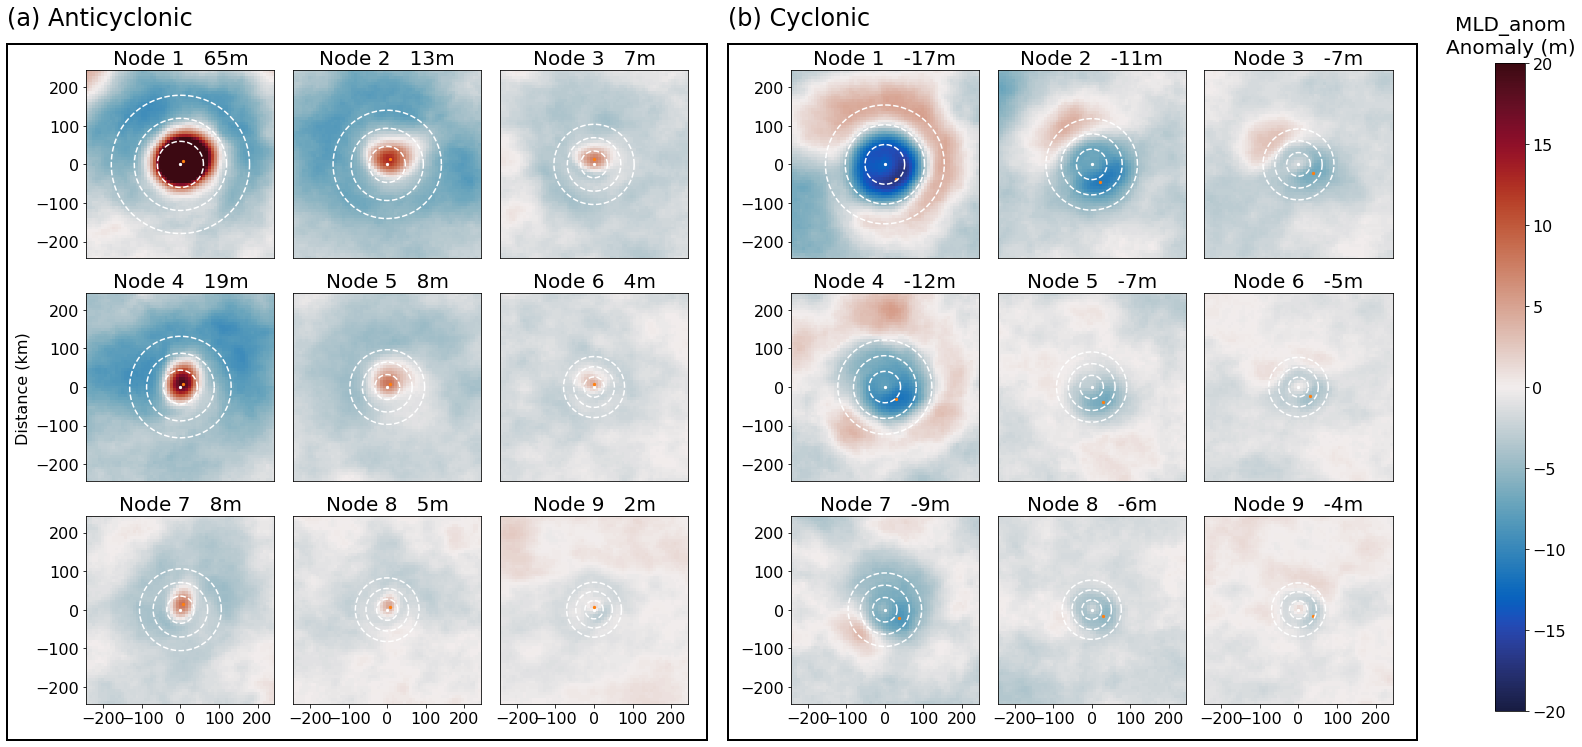

In [39]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh0 = ax.pcolormesh(lim_specC, lim_specC,  
                            MLD_anomA[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -20, vmax= 20
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %im" % (k+1,np.round(MLD_anomA[k,:,:].max(('y','x')))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(MLD_anomanomA[k,0,:,:].max(('y','x')))))
    
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_array[k])*np.cos(angle)
    y3=3*(radA_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    #add point for min/max
    #restricted search to 3r as the small one was picking up max anomaly way outside 
    y, x = np.where(MLD_anomA[k,:,:] == MLD_anomA[k,47-int(np.ceil((radA_array[k]*3)/7.5)):48+
                                        int(np.ceil((radA_array[k]*3)/7.5)),
                    47-int(np.ceil((radA_array[k]*3)/7.5)):48+int(np.ceil((radA_array[k]*3)/7.5))].max(('y','x')) )
    ax.scatter(lim_spec[x[0]],lim_spec[y[0]],marker='o',color='tab:orange',s=5)
    
    
#     con = ax.contour(lim_specC,lim_specC, 
#                             MLD_anomA[k,0,47-lim:48+lim,47-lim:48+lim],   
#                      levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
#                  colors='tab:grey')
    
#     ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.442, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            MLD_anomC[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -20, vmax= 20
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %im" % (k+1, np.round(MLD_anomC[k,:,:].min(('y','x')))),fontsize=20)
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_array[k])*np.cos(angle)
    y3=3*(radC_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    #add point for min/max
    y, x = np.where(MLD_anomC[k,:,:] == MLD_anomC[k,:,:].min(('y','x')) )
    ax.scatter(lim_spec[x[0]],lim_spec[y[0]],marker='o',color='tab:orange',s=5)
    
#     con = ax.contour(lim_specC,lim_specC, 
#                     MLD_anomC[k,0,47-lim:48+lim,47-lim:48+lim],  
#                      levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
#                  colors='tab:grey')
    
#     ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.435, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh0, cax=cbar_ax, orientation='vertical',
                    #label='MLD_anom anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-20,-15,-10,-5,0, 5,10,15,20])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('MLD_anom\nAnomaly (m)',pad=10,fontsize=20)
#cbar.set_label('MLD_anom anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/MLD_anomsurfaceNEW_Figure7.png', dpi=500)

## Heat and DIC storage and deficit

In [108]:
#get level thickness from mesh_zgr

In [43]:
e3t = grid_ACYC['e3t']

In [44]:
#density of seawater
rho = 1025
#specific heat capacity
cp = 3850

In [45]:
depth_extentC = np.zeros(n)
depth_extent_idx = np.zeros(n)
mask02 = Temp_anomC[:,:,47,47]<=-0.2
#reverse mask
mask02R = mask02[:].isel(deptht=slice(None, None, -1))
for i in range(n):
    #see where its True in reverse
    idxR = np.where(mask02R[i]==True)[0][0]
    #find index in actual mask
    idx = 46 -idxR 
    depth_extent_idx[i] = idx
    depth_extentC[i]=depth[idx]


In [46]:
depth_extentA = np.zeros(n)
depth_extent_idx = np.zeros(n)
mask02 = Temp_anomA[:,:,47,47]>=0.2
#reverse mask
mask02R = mask02[:].isel(deptht=slice(None, None, -1))
for i in range(n):
    idxR = np.where(mask02R[i]==True)[0][0]
    idx = 46-idxR
    depth_extent_idx[i] = idx
    depth_extentA[i]=depth[idx]

### Cyclonic Heat

In [47]:
area_wt = np.empty(shape=(46,95,95))
for i, val in enumerate(e3t):
    area_wt[i] = val*(7500**2)

#make empty array:
heat_C = np.empty(9)
for k in range(9):
    #depth idx
    depth_idx = find_ind(depth,depth_extentC[k])
    dist = 2*radC_array[k]
    dist_mask = np.where(dist_matrix>dist,0,1)
    
    #multiply by area weight    
    heat_C[k] = rho*cp*(Temp_anomC[k,:depth_idx+1,:,:]*dist_mask*area_wt[:depth_idx+1,:,:]).sum()



In [48]:
heat_cumC = heat_C*freqC

### Anticyclonic Heat

In [49]:
#make empty array:
heat_A = np.empty(n)
for k in range(n):
    #depth idx
    depth_idx = find_ind(depth,depth_extentA[k])
    dist = 2*radA_array[k]
    dist_mask = np.where(dist_matrix>dist,0,1)
    
    #multiply by area weight    
    heat_A[k] = rho*cp*(Temp_anomA[k,:depth_idx+1,:,:]*dist_mask*area_wt[:depth_idx+1,:,:]).sum()


In [50]:
heat_cumA = heat_A*freqA

In [51]:
#node order
idxA = np.argsort(radA_array).tolist()
idxC = np.argsort(radC_array).tolist()

In [52]:
node_orderA = []
for i in idxA:
    node_orderA += ['Node '+ str(i+1)]

node_orderC = []
for i in idxC:
    node_orderC += ['Node '+ str(i+1)]

In [53]:
node_orderA = ['N'+str(idxA[0]+1)]
for i in idxA[1:]:
    node_orderA += ['+ N '+ str(i+1)]

node_orderC = ['N'+str(idxC[0]+1)]
for i in idxC[1:]:
    node_orderC += ['+ N '+ str(i+1)]

In [54]:
# node_orderA=['Node 9','Node 6','Node 8','Node 5','Node 3','Node 7','Node 4','Node 2','Node 1']
# node_orderC=['Node 9','Node 6','Node 8','Node 5','Node 3','Node 7','Node 2','Node 4','Node 1']

# node_orderA=['N 9','+ N 6','+ N 8','+ N 5','+ N 3','+ N 7','+ N 4','+ N 2','+ N 1']
# node_orderC=['N 9','+ N 6','+ N 8','+ N 5','+ N 3','+ N 7','+ N 2','+ N 4','+ N 1']

cum_heatA = np.empty(9)
#initialise the first entry
cum_heatA[0] = heat_cumA[idxA[0]]
for i, idx in enumerate(idxA[1:]):
    cum_heatA[i+1] = cum_heatA[i] + heat_cumA[idx]

cum_heatC = np.empty(9)
#initialise the first entry
cum_heatC[0] = heat_cumC[idxC[0]]
for i, idx in enumerate(idxC[1:]):
    cum_heatC[i+1] = cum_heatC[i] + heat_cumC[idx]

### DIC

In [55]:
depth_extentC2 = np.zeros(n)
depth_idx2 = np.zeros(n)
mask02 = DIC_anomC[:,:,47,47]*1e6>2.5
#reverse mask
mask02R = mask02[:].isel(deptht=slice(None, None, -1))
for i in range(n):
    #see where its True in reverse
    idxR = np.where(mask02R[i]==True)[0][0]
    #find index in actual mask
    #incl the last enrty above or equal to 0.2
    idx = 46 -idxR 
    depth_idx2[i] = idx
    depth_extentC2[i]=depth[idx]

In [56]:
depth_extentA2 = np.zeros(n)
depth_idx2 = np.zeros(n)
mask02 = DIC_anomA[:,:,47,47]*1e6<-2.5
#reverse mask
mask02R = mask02[:].isel(deptht=slice(None, None, -1))
for i in range(n):
    idxR = np.where(mask02R[i]==True)[0][0]
    idx = 46-idxR
    depth_idx2[i] = idx
    depth_extentA2[i]=depth[idx]

In [57]:
DIC_C = np.empty(9)
for k in range(9):
    #depth idx
    depth_idx = find_ind(depth,depth_extentC2[k])
    dist = 2*radC_array[k]
    dist_mask = np.where(dist_matrix>dist,0,1)
    
    #multiply by area weight    
    DIC_C[k] = ((DIC_anomC[k,:depth_idx+1,:,:]*1e6)*dist_mask*area_wt[:depth_idx+1,:,:]).sum()


In [58]:
DIC_cumC = DIC_C*freqC

In [59]:
DIC_cumC.values

array([2.81345752e+17, 1.33140307e+17, 5.25567135e+16, 1.50793488e+17,
       5.99398110e+16, 2.15420252e+16, 9.10927724e+16, 2.97173247e+16,
       1.73462967e+16])

In [60]:
#make empty array:
DIC_A = np.empty(n)
for k in range(n):
    #depth idx
    depth_idx = find_ind(depth,depth_extentA2[k])
    dist = 2*radA_array[k]
    dist_mask = np.where(dist_matrix>dist,0,1)
    
    #multiply by area weight    
    DIC_A[k] = ((DIC_anomA[k,:depth_idx+1,:,:]*1e6)*dist_mask*area_wt[:depth_idx+1,:,:]).sum()




In [61]:
DIC_cumA = DIC_A*freqA


In [62]:
DIC_cumA.values

array([-4.23999469e+17, -1.75112675e+17, -6.79966165e+16, -1.10900050e+17,
       -8.77106077e+16, -2.22909479e+16, -4.99051170e+16, -2.59591366e+16,
       -2.05392811e+16])

In [63]:
cum_DICA = np.empty(9)
#initialise the first entry
cum_DICA[0] = DIC_cumA[idxA[0]]
for i, idx in enumerate(idxA[1:]):
    cum_DICA[i+1] = cum_DICA[i] + DIC_cumA[idx]

cum_DICC = np.empty(9)
#initialise the first entry
cum_DICC[0] = DIC_cumC[idxC[0]]
for i, idx in enumerate(idxC[1:]):
    cum_DICC[i+1] = cum_DICC[i] + DIC_cumC[idx]

In [64]:
heat_cumA = heat_cumA.values
heat_cumC = heat_cumC.values

DIC_cumA = DIC_cumA.values
DIC_cumC = DIC_cumC.values

In [65]:
#change from mmolC to molC (/1000)

#convert mmol to mmol
cum_DICC2 = cum_DICC/1000
cum_DICA2 = cum_DICA/1000

## Figure 10: Cummulative Heat and DIC plots

Text(0.51, 0.45, '(d)')

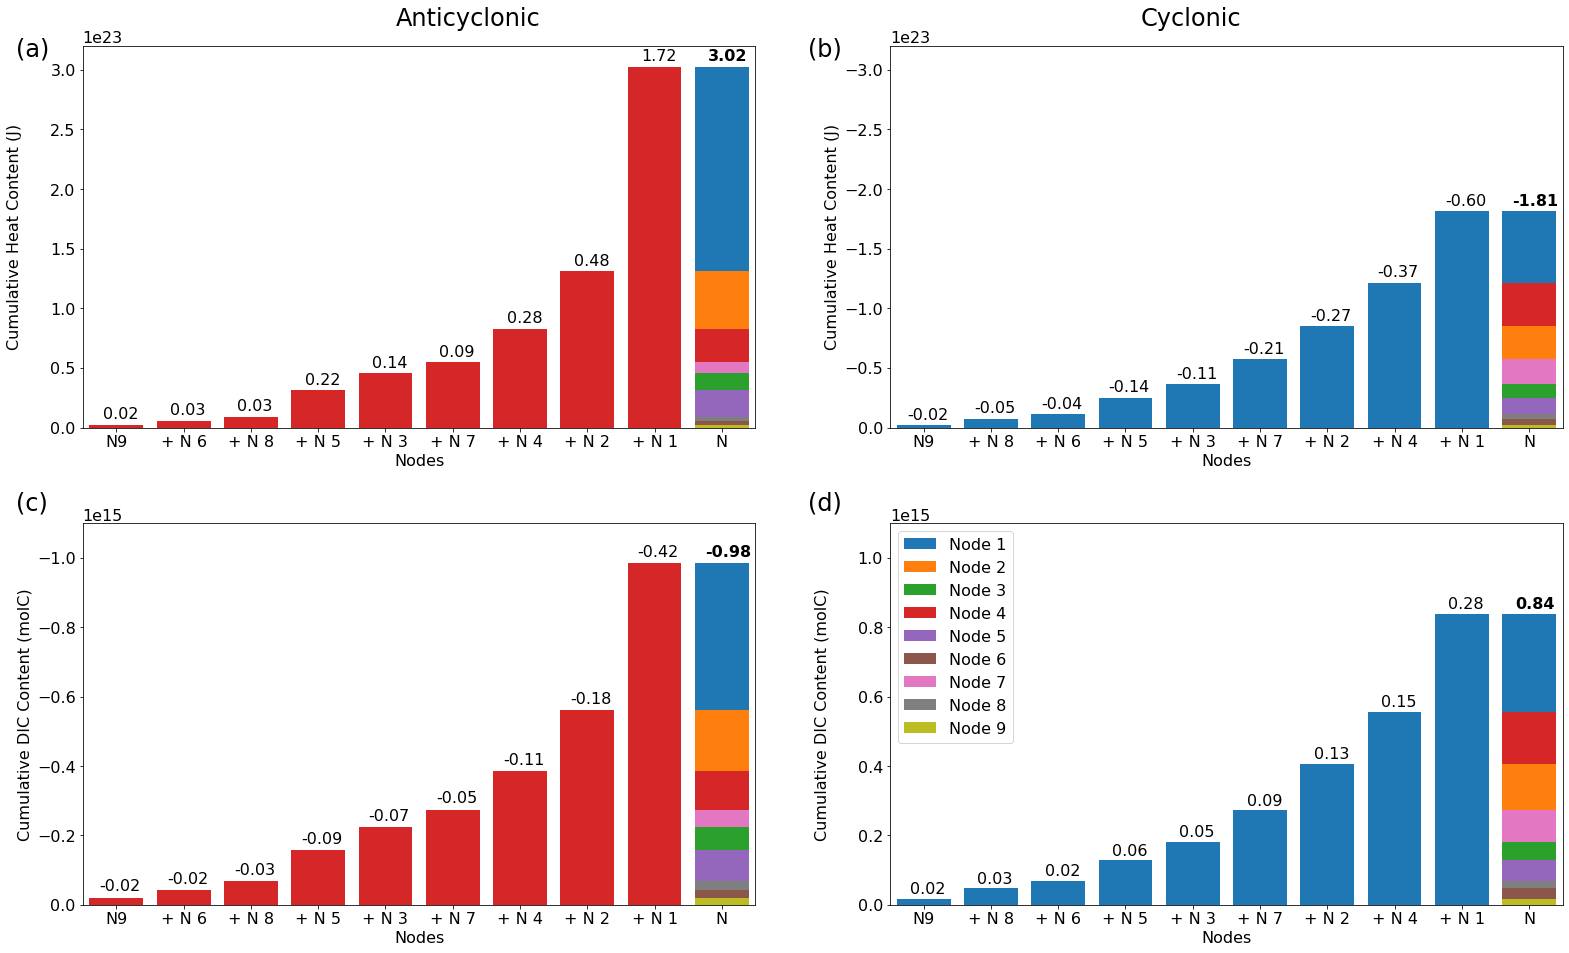

In [66]:

fig, ax = plt.subplots(2,2,figsize=(22,14))
ax=ax.reshape(-1)

#plt.figure(facecolor='white')

    #individ eddies
ax[0].bar(node_orderA,cum_heatA,color='tab:red')
#ax[0].plot(node_orderA,np.abs(cum_heatC),color='tab:blue')
 
ax[0].set_xlim(-0.5,9.5)
ax[0].set_ylim(0,3.2e23)
lab0 = ax[0].set_ylabel('Cumulative Heat Content (J)')
#lab0.set_position((-0.5, 0.5))
ax[0].yaxis.set_label_coords(-0.09, 0.5)
ax[0].set_xlabel('Nodes')
#ax[0].set_title('Anticyc Node Cumulative heat content')
p1 = ax[0].bar('N', cum_heatA[0],color='tab:olive')
p2 = ax[0].bar('N', cum_heatA[1]-cum_heatA[0],color='tab:brown', bottom=cum_heatA[0])
p3 = ax[0].bar('N', cum_heatA[2]-cum_heatA[1],color='tab:grey', bottom=cum_heatA[1])
p4 = ax[0].bar('N', cum_heatA[3]-cum_heatA[2],color='tab:purple', bottom=cum_heatA[2])
p5 = ax[0].bar('N', cum_heatA[4]-cum_heatA[3],color='tab:green', bottom=cum_heatA[3])
p6 = ax[0].bar('N', cum_heatA[5]-cum_heatA[4],color='tab:pink', bottom=cum_heatA[4])
p7 = ax[0].bar('N', cum_heatA[6]-cum_heatA[5],color='tab:red', bottom=cum_heatA[5])
p8 = ax[0].bar('N', cum_heatA[7]-cum_heatA[6],color='tab:orange', bottom=cum_heatA[6])
p9 = ax[0].bar('N', cum_heatA[8]-cum_heatA[7],color='tab:blue', bottom=cum_heatA[7])

for i,v in enumerate(cum_heatA):
    idx = int(node_orderA[i][-1])-1
    value_f = "{:.2f}".format(heat_cumA[idx]/1e23)
    ax[0].text(i-0.2,v+0.5e22,value_f,fontsize=16)
    
ax[0].text(9-0.2,cum_heatA[8]+0.5e22,"{:.2f}".format(heat_cumA.sum()/1e23),fontsize=16,weight='bold')

ax[1].bar(node_orderC,cum_heatC,color='tab:blue')
    
    
    #smallest eddies: Node 6,8,9
#     ax[1].scatter(radA_avg689,heat_cumA689,color = 'tab:orange')
#     #eddies < 50km: Nodes 3,5,6,7,8,9
#     ax[1].scatter(radA_small_avg,heat_small_cumA,color = 'tab:purple')
c1 = ax[1].bar('N', cum_heatC[0],color='tab:olive',label='Node 9')
c2 = ax[1].bar('N', cum_heatC[1]-cum_heatC[0],color='tab:brown', bottom=cum_heatC[0],label='Node 6')
c3 = ax[1].bar('N', cum_heatC[2]-cum_heatC[1],color='tab:grey', bottom=cum_heatC[1],label='Node 8')
c4 = ax[1].bar('N', cum_heatC[3]-cum_heatC[2],color='tab:purple', bottom=cum_heatC[2],label='Node 5')
c5 = ax[1].bar('N', cum_heatC[4]-cum_heatC[3],color='tab:green', bottom=cum_heatC[3],label='Node 3')
c6 = ax[1].bar('N', cum_heatC[5]-cum_heatC[4],color='tab:pink', bottom=cum_heatC[4],label='Node 7')
c7 = ax[1].bar('N', cum_heatC[6]-cum_heatC[5],color='tab:orange', bottom=cum_heatC[5],label='Node 2')
c8 = ax[1].bar('N', cum_heatC[7]-cum_heatC[6],color='tab:red', bottom=cum_heatC[6],label='Node 4')
c9 = ax[1].bar('N', cum_heatC[8]-cum_heatC[7],color='tab:blue', bottom=cum_heatC[7],label='Node 1')

ax[1].set_xlim(-0.5,9.5)
ax[1].set_ylim(0,-3.2e23)
#ax[1].set_ylim(0,4)
ax[1].set_ylabel('Cumulative Heat Content (J)')
ax[1].set_xlabel('Nodes')
#ax[1].set_title('Cyc Node cumulative heat content')
#ax[1].legend(handles=[c9,c7,c5,c8,c4,c2,c6,c3,c1])

for i,v in enumerate(cum_heatC):
    idx = int(node_orderC[i][-1])-1
    value_f = "{:.2f}".format(heat_cumC[idx]/1e23)
    ax[1].text(i-0.25,(v)-0.5e22,value_f,fontsize=16)

ax[1].text(9-0.25,cum_heatC[8]-0.5e22,"{:.2f}".format(heat_cumC.sum()/1e23),fontsize=16,weight='bold')

ax[2].bar(node_orderA,cum_DICA2,color='tab:red')
#ax[2].plot(node_orderA,np.abs(cum_DICC2),color='tab:blue')
 
ax[2].set_xlim(-0.5,9.5)
ax[2].set_ylim(0,-1.1e15)
ax[2].set_ylabel('Cumulative DIC Content (molC)')
ax[2].set_xlabel('Nodes')
#ax[2].set_title('Anticyc Node Cumulative DIC content')
p1 = ax[2].bar('N', cum_DICA2[0],color='tab:olive')
p2 = ax[2].bar('N', cum_DICA2[1]-cum_DICA2[0],color='tab:brown', bottom=cum_DICA2[0])
p3 = ax[2].bar('N', cum_DICA2[2]-cum_DICA2[1],color='tab:grey', bottom=cum_DICA2[1])
p4 = ax[2].bar('N', cum_DICA2[3]-cum_DICA2[2],color='tab:purple', bottom=cum_DICA2[2])
p5 = ax[2].bar('N', cum_DICA2[4]-cum_DICA2[3],color='tab:green', bottom=cum_DICA2[3])
p6 = ax[2].bar('N', cum_DICA2[5]-cum_DICA2[4],color='tab:pink', bottom=cum_DICA2[4])
p7 = ax[2].bar('N', cum_DICA2[6]-cum_DICA2[5],color='tab:red', bottom=cum_DICA2[5])
p8 = ax[2].bar('N', cum_DICA2[7]-cum_DICA2[6],color='tab:orange', bottom=cum_DICA2[6])
p9 = ax[2].bar('N', cum_DICA2[8]-cum_DICA2[7],color='tab:blue', bottom=cum_DICA2[7])

for i,v in enumerate(cum_DICA2):
    idx = int(node_orderA[i][-1])-1
    value_f = "{:.2f}".format((DIC_cumA[idx]/1000)/1e15)
    ax[2].text(i-0.25,v-0.02e15,value_f,fontsize=16)
    
ax[2].text(9-0.25,cum_DICA2[8]-0.02e15,"{:.2f}".format((DIC_cumA.sum()/1000)/1e15),fontsize=16,weight='bold')

ax[3].bar(node_orderC,cum_DICC2,color='tab:blue')
    
    
    #smallest eddies: Node 6,8,9
#     ax[3].scatter(radA_avg689,DIC_cumA689,color = 'tab:orange')
#     #eddies < 50km: Nodes 3,5,6,7,8,9
#     ax[3].scatter(radA_small_avg,DIC_small_cumA,color = 'tab:purple')
c1 = ax[3].bar('N', cum_DICC2[0],color='tab:olive',label='Node 9')
c2 = ax[3].bar('N', cum_DICC2[1]-cum_DICC2[0],color='tab:brown', bottom=cum_DICC2[0],label='Node 6')
c3 = ax[3].bar('N', cum_DICC2[2]-cum_DICC2[1],color='tab:grey', bottom=cum_DICC2[1],label='Node 8')
c4 = ax[3].bar('N', cum_DICC2[3]-cum_DICC2[2],color='tab:purple', bottom=cum_DICC2[2],label='Node 5')
c5 = ax[3].bar('N', cum_DICC2[4]-cum_DICC2[3],color='tab:green', bottom=cum_DICC2[3],label='Node 3')
c6 = ax[3].bar('N', cum_DICC2[5]-cum_DICC2[4],color='tab:pink', bottom=cum_DICC2[4],label='Node 7')
c7 = ax[3].bar('N', cum_DICC2[6]-cum_DICC2[5],color='tab:orange', bottom=cum_DICC2[5],label='Node 2')
c8 = ax[3].bar('N', cum_DICC2[7]-cum_DICC2[6],color='tab:red', bottom=cum_DICC2[6],label='Node 4')
c9 = ax[3].bar('N', cum_DICC2[8]-cum_DICC2[7],color='tab:blue', bottom=cum_DICC2[7],label='Node 1')

ax[3].set_xlim(-0.5,9.5)
ax[3].set_ylim(0,1.1e15)
#ax[3].set_ylim(0,4)
ax[3].set_ylabel('Cumulative DIC Content (molC)')
ax[3].set_xlabel('Nodes')
ax[3].yaxis.set_label_coords(-0.09, 0.5)
#ax[3].set_title('Cyc Node cumulative DIC content')
ax[3].legend(handles=[c9,c7,c5,c8,c4,c2,c6,c3,c1])

for i,v in enumerate(cum_DICC2):
    idx = int(node_orderC[i][-1])-1
    value_f = "{:.2f}".format((DIC_cumC[idx]/1000)/1e15)
    ax[3].text(i-0.2,v+0.015e15,value_f,fontsize=16)

ax[3].text(9-0.2,cum_DICC2[8]+0.015e15,"{:.2f}".format((DIC_cumC.sum()/1000)/1e15),fontsize=16,weight='bold')


fig.tight_layout()
plt.subplots_adjust(top=0.91)
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.25)
#plt.subplots_adjust(left=0.1)
#plt.subplots_adjust(right=0.95)
#plt.subplots_adjust(bottom=0.1)


# Add labels
fig.text(0.01, 0.9, '(a)', fontsize=24, fontweight='normal')
fig.text(0.51, 0.9, '(b)', fontsize=24, fontweight='normal')

fig.text(0.25, 0.93, 'Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.72, 0.93, 'Cyclonic', fontsize=24, fontweight='normal')

fig.text(0.01, 0.45, '(c)', fontsize=24, fontweight='normal')
fig.text(0.51, 0.45, '(d)', fontsize=24, fontweight='normal')



# ylabel = ax.set_ylabel('Y Label', rotation=0)
# ylabel.set_label_coords(-0.1, 0.5) # adjust the position of the ylabel to the left

# plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_Heat_DIC_content_Figure13_values.png', dpi=500
#             ,facecolor='white',transparent=False)

## Supplememntary

## Figure S5: Anticyclonic Monopole and Dipole Contributions

Text(0.01, 0.4, 'Distance (km)')

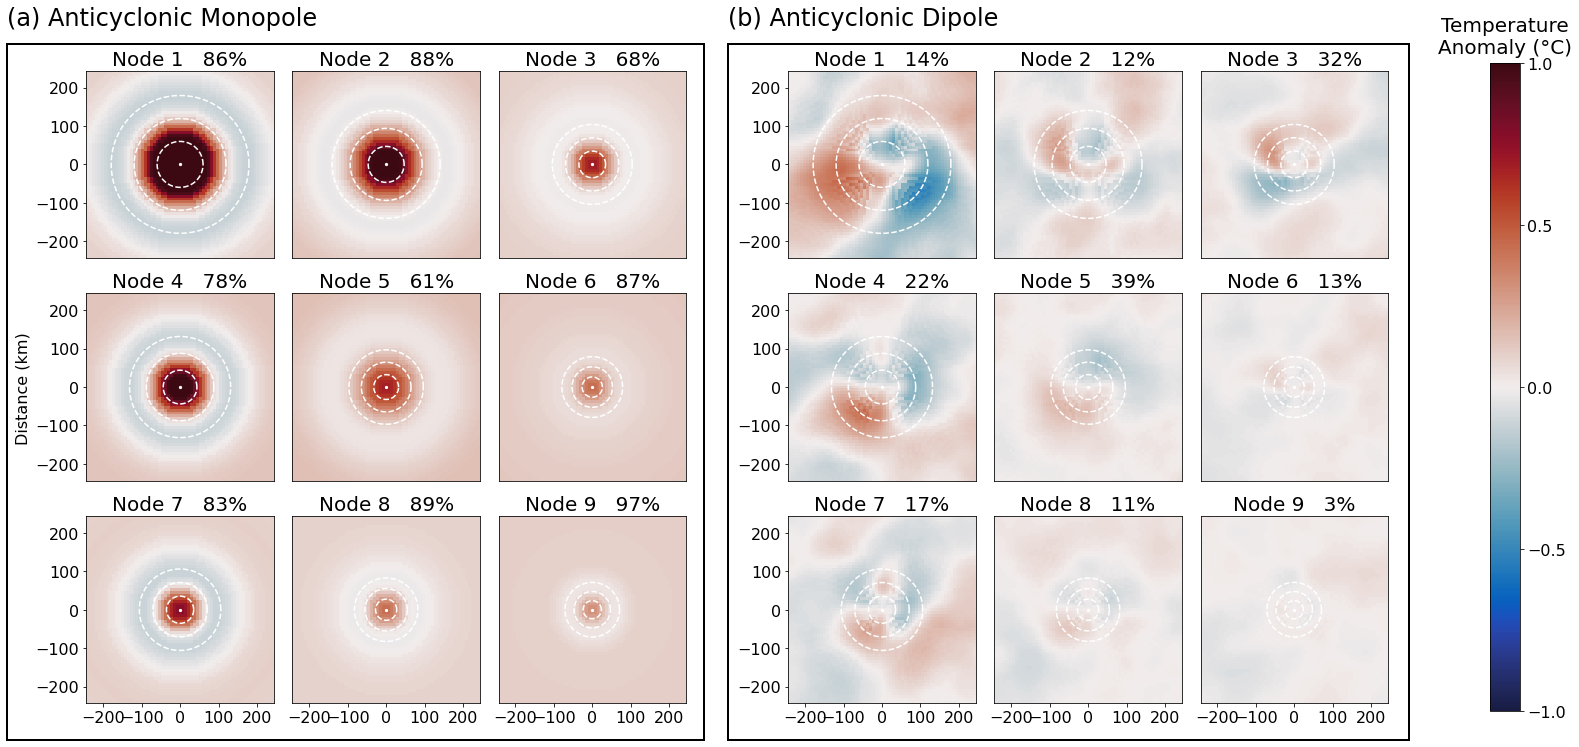

In [67]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Mono_A[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %d%%" % (k+1, np.round(V_monoA[k]*100)),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(SOMS_Temp_anomA[k,0,:,:].max(('y','x')))))
    
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_array[k])*np.cos(angle)
    y3=3*(radA_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Dipole_A[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %d%%" % (k+1, np.round((100-V_monoA[k]*100))),fontsize=20)
    
    #CIRCLE 1rad
    x=(radA_array[k])*np.cos(angle)
    y=(radA_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_array[k])*np.cos(angle)
    y2=2*(radA_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_array[k])*np.cos(angle)
    y3=3*(radA_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.43, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic Monopole', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Anticyclonic Dipole', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_Monodipole_FigureS.png', dpi=500)

## Figure S6: Cyclonic Monopole and Dipole Contributions

Text(0.01, 0.4, 'Distance (km)')

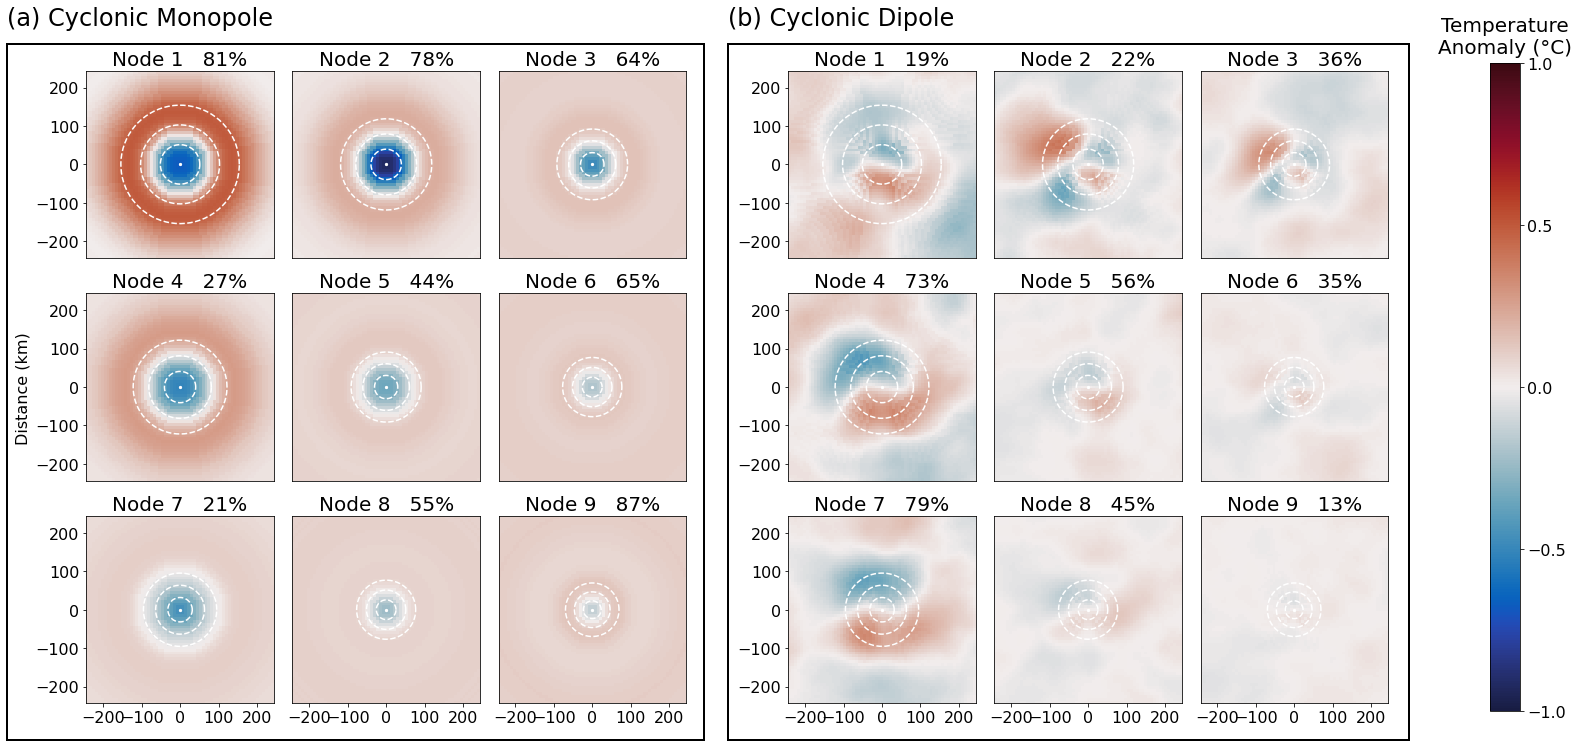

In [68]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Mono_C[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %d%%" % (k+1, np.round(V_monoC[k]*100)),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(SOMS_Temp_anomA[k,0,:,:].max(('y','x')))))
    
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_array[k])*np.cos(angle)
    y3=3*(radC_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Dipole_C[k,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_title("Node %i   %d%%" % (k+1, np.round((100-V_monoC[k]*100))),fontsize=20)
    
    #CIRCLE 1rad
    x=(radC_array[k])*np.cos(angle)
    y=(radC_array[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_array[k])*np.cos(angle)
    y2=2*(radC_array[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_array[k])*np.cos(angle)
    y3=3*(radC_array[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.46, 0.005), 0.43, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Cyclonic Monopole', fontsize=24, fontweight='normal')
fig.text(0.46, 0.95, '(b) Cyclonic Dipole', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_Monodipole_CYC_FigureS.png', dpi=500)